In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [2]:
# Read the CSV File

# df = pd.read_csv("foodData.csv")
df = pd.read_csv("newfooddata2 - Sheet1.csv")
df.head()

UserID  Gender     Age Group  \
0     430  Female       25 - 54   
1     103    Male  65 and above   
2     581    Male       25 - 54   
3     816    Male  14 and below   
4     735  Female       15 - 24   

                         Top 6 most preferred dishes  laksa  Chili Crab  \
0  Laksa , Char Kway Teow, Hainanese Chicken Rice...      1           0   
1  Char Kway Teow, Hainanese Chicken Rice, Sliced...      0           0   
2  Laksa , Sliced Fish Soup, Chinese Economy Rice...      1           0   
3  Hainanese Chicken Rice, Sliced Fish Soup, Chin...      0           0   
4  Char Kway Teow, Hainanese Chicken Rice, Japane...      0           0   

   Char Kway Teow  hainanese chicken rice  Sliced Fish Soup  Fish and Chips  \
0               1                       1                 0               1   
1               1                       1                 1               0   
2               0                       0                 1               0   
3               0                       1                 1               0   
4               1                       1                 0               0   

   ...  Roti Prata  Black Pepper Crab  Roti John  Cereal Prawn  \
0  ...           0                  0          0             0   
1  ...           0                  0          0             0   
2  ...           0                  0          0             0   
3  ...           0                  0          0             0   
4  ...           1                  0          0             0   

   Beef Kway Teow  Katong laksa  Sambal Stingray  Crab Bee Hoon Soup  Satay  \
0               0             0                0                   0      0   
1               0             0                1                   0      0   
2               0             0                0                   1      0   
3               0             0                0                   0      1   
4               1             0                0                   0      0   

   sum  
0    6  
1    6  
2    6  
3    6  
4    6  

[5 rows x 29 columns]

In [3]:
# Separating the Datasets into different Dataframes

col_names = []
new_df = df

for col in df.columns:  
    x = col.replace(" ", "_")
    col_names.append(x)
    
new_df.columns = [col_names]
new_df = new_df.drop("sum", axis = 1)

le_data = LabelEncoder()

new_df["Gender_n"] = le_data.fit_transform(new_df["Gender"])
new_df["Age_Group_n"] = le_data.fit_transform(new_df["Age_Group"])

new_df


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


UserID  Gender     Age_Group  \
0      430  Female       25 - 54   
1      103    Male  65 and above   
2      581    Male       25 - 54   
3      816    Male  14 and below   
4      735  Female       15 - 24   
..     ...     ...           ...   
995    711  Female       15 - 24   
996    449  Female       25 - 54   
997     91  Female  65 and above   
998    136    Male  65 and above   
999    436  Female       25 - 54   

                           Top_6_most_preferred_dishes laksa Chili_Crab  \
0    Laksa , Char Kway Teow, Hainanese Chicken Rice...     1          0   
1    Char Kway Teow, Hainanese Chicken Rice, Sliced...     0          0   
2    Laksa , Sliced Fish Soup, Chinese Economy Rice...     1          0   
3    Hainanese Chicken Rice, Sliced Fish Soup, Chin...     0          0   
4    Char Kway Teow, Hainanese Chicken Rice, Japane...     0          0   
..                                                 ...   ...        ...   
995  Hainanese Chicken Rice, Sliced Fish Soup, Hokk...     0          0   
996  Chili Crab, Sliced Fish Soup, Bak Kut Teh, Bla...     0          0   
997  Chili Crab, Hainanese Chicken Rice, Sliced Fis...     0          0   
998  Char Kway Teow, Hainanese Chicken Rice, Sliced...     1          0   
999  Laksa , Char Kway Teow, Hokkien Mee, Kway Chap...     1          0   

    Char_Kway_Teow hainanese_chicken_rice Sliced_Fish_Soup Fish_and_Chips  \
0                1                      1                0              1   
1                1                      1                1              0   
2                0                      0                1              0   
3                0                      1                1              0   
4                1                      1                0              0   
..             ...                    ...              ...            ...   
995              0                      1                1              1   
996              0                      0                1              0   
997              0                      1                1              0   
998              1                      0                0              0   
999              1                      0                0              0   

     ... Black_Pepper_Crab Roti_John Cereal_Prawn Beef_Kway_Teow Katong_laksa  \
0    ...                 0         0            0              0            0   
1    ...                 0         0            0              0            0   
2    ...                 0         0            0              0            0   
3    ...                 0         0            0              0            0   
4    ...                 0         0            0              1            0   
..   ...               ...       ...          ...            ...          ...   
995  ...                 0         0            1              0            0   
996  ...                 1         1            1              0            0   
997  ...                 0         0            0              0            0   
998  ...                 0         0            0              0            0   
999  ...                 0         0            0              0            0   

    Sambal_Stingray Crab_Bee_Hoon_Soup Satay Gender_n Age_Group_n  
0                 0                  0     0        0           2  
1                 1                  0     0        1           4  
2                 0                  1     0        1           2  
3                 0                  0     1        1           0  
4                 0                  0     0        0           1  
..              ...                ...   ...      ...         ...  
995               1                  0     0        0           1  
996               1                  0     0        0           2  
997               0                  1     0        0           4  
998               0                  0     0        1           4  
999               0     

In [4]:
X = new_df[["Gender_n", "Age_Group_n", "laksa", "Chili_Crab", "Char_Kway_Teow", "hainanese_chicken_rice", "Sliced_Fish_Soup", "Fish_and_Chips", "Chinese_Economy_Rice", "Japanese_Bento", "Curry_laksa", "Yu_Sheng", "Duck_Rice", "Fish_Head_Curry", "Bak_Kut_Teh", "Hokkien_Mee", "Kway_Chap", "Roti_Prata", "Black_Pepper_Crab", "Roti_John", "Cereal_Prawn", "Beef_Kway_Teow", "Katong_laksa", "Sambal_Stingray",  "Crab_Bee_Hoon_Soup", "Satay"]]

y = new_df["UserID"]
y.head

<bound method NDFrame.head of     UserID
0      430
1      103
2      581
3      816
4      735
..     ...
995    711
996    449
997     91
998    136
999    436

[1000 rows x 1 columns]>

In [5]:
# Split training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(f"X_train = {X_train.shape} X_test = {X_test.shape} y_train = {y_train.shape} y_test = {y_test.shape}")
X_test.iloc[:1]

X_train = (800, 26) X_test = (200, 26) y_train = (800, 1) y_test = (200, 1)


Gender_n Age_Group_n laksa Chili_Crab Char_Kway_Teow  \
206        1           0     0          0              1   

    hainanese_chicken_rice Sliced_Fish_Soup Fish_and_Chips  \
206                      0                0              1   

    Chinese_Economy_Rice Japanese_Bento  ... Kway_Chap Roti_Prata  \
206                    0              0  ...         0          1   

    Black_Pepper_Crab Roti_John Cereal_Prawn Beef_Kway_Teow Katong_laksa  \
206                 0         1            0              0            0   

    Sambal_Stingray Crab_Bee_Hoon_Soup Satay  
206               1                  0     1  

[1 rows x 26 columns]

In [6]:
# Fitting data into model

model = RandomForestClassifier()

model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

# y_pred = model.predict(X_test.iloc[:1])

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [7]:

# Prediction

'''

Gender_n 
    Female = 0
    Male = 1
    
Age_Group_n
    14 and below = 0
    15 - 24 = 1
    25 - 54 = 2
    55 - 64 = 3
    65 and above = 4
    
'''

gender = input("Enter Gender : ")
age = int(input("Enter Age : "))
food_number = int(input("\nChose one Food Number (1 - 24) :\n1. Laksa\n2. Chilli Crab\n3. Char Kway Teow\n4. Hainanese Chicken Rice\n5. Sliced Fish Soup\n6. Fish and Chips\n7. Chinese Economy Rice\n8. Japanese Bento\n9. Curry Laksa\n10. Yu Sheng\n11. Duck Rice\n12. Fish Head Curry\n13. Bak Kut Teh\n14. Hokkien Mee\n15. Kway Chap\n16. Roti Prata\n17. Black Pepper\n18. Roti John\n19. Cereal Prawn\n20. Beef Kway Teow\n21. Katong Laksa\n22. Sambal Stingray\n23. Crab Bee Hoon\n24. Satay\n"))

gendern = 0
agen = 0

if gender == "Male".lower() or gender == "Male".upper():
    print("MALE - 1")
    gendern = 1
    if age > 0:
        if age < 15:
            print("14 and below")
            agen = 0
        elif age >= 15 and age <= 24:
            print("15 - 24")
            agen = 1
        elif age >= 25 and age <= 54:
            print("25 - 54")
            agen = 2
        elif age >= 55 and age <= 64:
            print("55 - 64")
            agen = 3
        elif age >= 65:
            print("65 and above")
            agen = 4
    else:
        print("Invalid Age")
    
elif gender == "Female".lower() or gender == "Female".upper():
    print("FEMALE - 0")
    gendern = 0
    if age > 0:
        if age < 15:
            print("14 and below")
            agen = 0
        elif age >= 15 and age <= 24:
            print("15 - 24")
            agen = 1
        elif age >= 25 and age <= 54:
            print("25 - 54")
            agen = 2
        elif age >= 55 and age <= 64:
            print("55 - 64")
            agen = 3
        elif age >= 65:
            print("65 and above")
            agen = 4
    else:
        print("Invalid Age")
    
else:
    print("Invalid Gender")
    
'''
1. Laksa
2. Chilli Crab
3. Char Kway Teow
4. Hainanese Chicken Rice
5. Sliced Fish Soup
6. Fish and Chips
7. Chinese Economy Rice
8. Japanese Bento
9. Curry Laksa
10. Yu Sheng
11. Duck Rice
12. Fish Head Curry
13. Bak Kut Teh
14. Hokkien Mee
15. Kway Chap
16. Roti Prata
17. Black Pepper
18. Roti John
19. Cereal Prawn
20. Beef Kway Teow
21. Katong Laksa
22. Sambal Stingray
23. Crab Bee Hoon
24. Satay
'''

f1 = 0
f2 = 0
f3 = 0
f4 = 0
f5 = 0
f6 = 0
f7 = 0
f8 = 0
f9 = 0
f10 = 0
f11 = 0
f12 = 0
f13 = 0
f14 = 0
f15 = 0
f16 = 0
f17 = 0
f18 = 0
f19 = 0
f20 = 0
f21 = 0
f22 = 0
f23 = 0
f24 = 0

if food_number == 1:
    f1 = 1
elif food_number == 2:
    f2 = 1
elif food_number == 3:
    f3 = 1
elif food_number == 4:
    f4 = 1
elif food_number == 5:
    f5 = 1
elif food_number == 6:
    f6 = 1
elif food_number == 7:
    f7 = 1
elif food_number == 8:
    f8 = 1
elif food_number == 9:
    f9 = 1
elif food_number == 10:
    f10 = 1
elif food_number == 11:
    f11 = 1
elif food_number == 12:
    f12 = 1
elif food_number == 13:
    f13 = 1
elif food_number == 14:
    f14 = 1
elif food_number == 15:
    f15 = 1
elif food_number == 16:
    f16 = 1
elif food_number == 17:
    f17 = 1
elif food_number == 18:
    f18 = 1
elif food_number == 19:
    f19 = 1
elif food_number == 20:
    f20 = 1
elif food_number == 21:
    f21 = 1
elif food_number == 22:
    f22 = 1
elif food_number == 23:
    f23 = 1
elif food_number == 24:
    f24 = 1
else:
    print("Invalid Food Number")

print("Input Food:", f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f1/4, f15, f16, f17, f18, f19, f20, f21, f22, f23, f24,)
predictions = model.predict([[gendern, agen, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18, f19, f20, f21, f22, f23, f24,]])
predictions

Enter Gender : male
Enter Age : 12

Chose one Food Number (1 - 24) :
1. Laksa
2. Chilli Crab
3. Char Kway Teow
4. Hainanese Chicken Rice
5. Sliced Fish Soup
6. Fish and Chips
7. Chinese Economy Rice
8. Japanese Bento
9. Curry Laksa
10. Yu Sheng
11. Duck Rice
12. Fish Head Curry
13. Bak Kut Teh
14. Hokkien Mee
15. Kway Chap
16. Roti Prata
17. Black Pepper
18. Roti John
19. Cereal Prawn
20. Beef Kway Teow
21. Katong Laksa
22. Sambal Stingray
23. Crab Bee Hoon
24. Satay
22
MALE - 1
14 and below
Input Food: 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0 0 0 0 0 0 0 1 0 0


array([635], dtype=int64)

In [8]:
# Displaying similar Users
    
'''

Gender_n 
    Female = 0
    Male = 1
    
Age_Group_n
    14 and below = 0
    15 - 24 = 1
    25 - 54 = 2
    55 - 64 = 3
    65 and above = 4
    
1. Laksa
2. Chilli Crab
3. Char Kway Teow
4. Hainanese Chicken Rice
5. Sliced Fish Soup
6. Fish and Chips
7. Chinese Economy Rice
8. Japanese Bento
9. Curry Laksa
10. Yu Sheng
11. Duck Rice
12. Fish Head Curry
13. Bak Kut Teh
14. Hokkien Mee
15. Kway Chap
16. Roti Prata
17. Black Pepper
18. Roti John
19. Cereal Prawn
20. Beef Kway Teow
21. Katong Laksa
22. Sambal Stingray
23. Crab Bee Hoon
24. Satay
'''
# newfooddata2 - Sheet1.csv > Top_6_most_preferred_dishes_n
# foodData.csv > _Top_6_most_preferred_dishes_n]

def all_prefs():
    x = new_df.loc[:,"UserID"]
    return x

def nth_data(i : int, feature : str):
    x = new_df.loc[i,feature]
    return x

a = all_prefs().T
x_df = pd.DataFrame()
y_df = new_df


# Print specific rows based on chosen foods
for i in a:
    if nth_data(i, "UserID").values.ravel() == predictions:
        d = {"UserID" : nth_data(i, "UserID").values.ravel(),
             "Gender" : nth_data(i, "Gender").values.ravel(),
             "Age_Group" : nth_data(i, "Age_Group").values.ravel(),
             "laksa" : nth_data(i, "laksa").values.ravel(),
             "Chili_Crab" : nth_data(i, "Chili_Crab").values.ravel(),
             "Char_Kway_Teow" : nth_data(i, "Char_Kway_Teow").values.ravel(),
             "hainanese_chicken_rice" : nth_data(i, "hainanese_chicken_rice").values.ravel(),
             "Sliced_Fish_Soup" : nth_data(i, "Sliced_Fish_Soup").values.ravel(),
             "Fish_and_Chips" : nth_data(i, "Fish_and_Chips").values.ravel(),
             "Chinese_Economy_Rice" : nth_data(i, "Chinese_Economy_Rice").values.ravel(),
             "Japanese_Bento" : nth_data(i, "Japanese_Bento").values.ravel(),
             "Curry_laksa" : nth_data(i, "Curry_laksa").values.ravel(),
             "Yu_Sheng" : nth_data(i, "Yu_Sheng").values.ravel(),
             "Duck_Rice" : nth_data(i, "Duck_Rice").values.ravel(),
             "Fish_Head_Curry" : nth_data(i, "Fish_Head_Curry").values.ravel(),
             "Bak_Kut_Teh" : nth_data(i, "Bak_Kut_Teh").values.ravel(),
             "Hokkien_Mee" : nth_data(i, "Hokkien_Mee").values.ravel(),
             "Kway_Chap" : nth_data(i, "Kway_Chap").values.ravel(),
             "Roti_Prata" : nth_data(i, "Roti_Prata").values.ravel(),
             "Black_Pepper_Crab" : nth_data(i, "Black_Pepper_Crab").values.ravel(),
             "Roti_John" : nth_data(i, "Roti_John").values.ravel(),
             "Cereal_Prawn" : nth_data(i, "Cereal_Prawn").values.ravel(),
             "Beef_Kway_Teow" : nth_data(i, "Beef_Kway_Teow").values.ravel(),
             "Katong_laksa" : nth_data(i, "Katong_laksa").values.ravel(),
             "Sambal_Stingray" : nth_data(i, "Sambal_Stingray").values.ravel(),
             "Crab_Bee_Hoon_Soup" : nth_data(i, "Crab_Bee_Hoon_Soup").values.ravel(),
             "Satay" : nth_data(i, "Satay").values.ravel(),
            }
        x_df = x_df.append(d, ignore_index=True)
        y_df = y_df.drop((nth_data(i, "UserID").values.ravel() - 1))
        
        
print("Predicted Value: ", predictions)
print("Chosen Gender: ", gender)
print("Chosen Age: ", age)

x_df.T

Predicted Value:  [635]
Chosen Gender:  male
Chosen Age:  12


0
UserID                      [635]
Gender                     [Male]
Age_Group               [15 - 24]
laksa                         [0]
Chili_Crab                    [0]
Char_Kway_Teow                [0]
hainanese_chicken_rice        [0]
Sliced_Fish_Soup              [1]
Fish_and_Chips                [0]
Chinese_Economy_Rice          [0]
Japanese_Bento                [0]
Curry_laksa                   [1]
Yu_Sheng                      [0]
Duck_Rice                     [0]
Fish_Head_Curry               [0]
Bak_Kut_Teh                   [1]
Hokkien_Mee                   [0]
Kway_Chap                     [0]
Roti_Prata                    [0]
Black_Pepper_Crab             [0]
Roti_John                     [0]
Cereal_Prawn                  [0]
Beef_Kway_Teow                [0]
Katong_laksa                  [0]
Sambal_Stingray               [1]
Crab_Bee_Hoon_Soup            [1]
Satay                         [1]

In [9]:
a_df = pd.DataFrame()
rec_df = pd.DataFrame()
rec_list = []
count = 0

temp_df = new_df[[
              "laksa", "Chili_Crab", "Char_Kway_Teow", "hainanese_chicken_rice",
              "Sliced_Fish_Soup", "Fish_and_Chips", "Chinese_Economy_Rice",
              "Japanese_Bento", "Curry_laksa", "Yu_Sheng", "Duck_Rice",
              "Fish_Head_Curry", "Bak_Kut_Teh", "Hokkien_Mee", "Kway_Chap",
              "Roti_Prata", "Black_Pepper_Crab", "Roti_John", "Cereal_Prawn",
              "Beef_Kway_Teow", "Katong_laksa", "Sambal_Stingray", 
              "Crab_Bee_Hoon_Soup", "Satay"
             ]]

for i in a:
    if nth_data(i, "UserID").values.ravel() == predictions:
        a_df = a_df.append(temp_df.iloc[[i]])
    
for i in a_df:
    if (a_df.T.iloc[[count]].values.ravel()).all() == 1:
        for j in i:
            j = j.replace("_", " ")
            rec_list.append(j)
    count += 1

chosen_food = temp_df.T.iloc[[food_number-1]].T

for i in chosen_food:
    for j in i:
        chosen_food = j.replace("_", " ")
    
for i in rec_list:
    if i == chosen_food:
        rec_list.remove(chosen_food)
        
if len(rec_list) == 6:
    rec_list.pop(0)
    
print("""
=========================================

Your Recommended Food Items are :
""")
for i in rec_list:
    print(i)

print("\n=========================================")



Your Recommended Food Items are :

Sliced Fish Soup
Curry laksa
Bak Kut Teh
Crab Bee Hoon Soup
Satay



In [10]:
print(f"Accuracy of Random Forest Model is {accuracy_score(y_test, y_pred)}")

confusion_matrix(y_test, y_pred)

Accuracy of Random Forest Model is 0.0


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

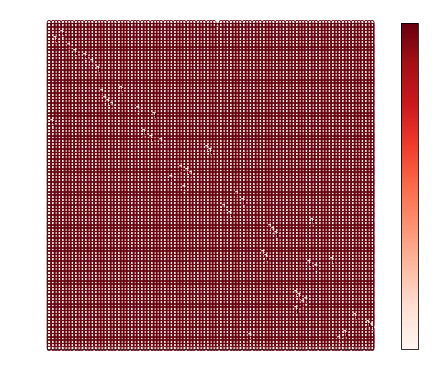

In [11]:
plot_X_test = X_test[:50]
plot_y_test = y_test[:50]

matrix = plot_confusion_matrix(model, plot_X_test, plot_y_test, cmap = plt.cm.Reds)
matrix.ax_.set_title("Confusion Matrix", color = "white")
plt.xlabel("Predicted Label", color = "white")
plt.ylabel("True Label", color = "white")
plt.gcf().axes[0].tick_params(colors = "white")
plt.gcf().axes[1].tick_params(colors = "white")
plt.gcf().set_size_inches(10, 6)
plt.show()